In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import itertools
import plotly.express as px

# importing stacking lib
from vecstack import stacking

# Breathtaking visuals
import mplcyberpunk

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
plt.style.use("cyberpunk")

---

# 1. Load Data

In [4]:
#train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
#test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [7]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

---

# 2. Data Exploration

Dataset rows and columns.

In [8]:
train_col = train.columns
print("No. of Training columns & rows:", train.shape, "\n", "Training columns: \n", train_col)

print("-"*100)
test_col = test.columns
print("No. of Testing columns & rows:", test.shape, "\n", "Testing columns: \n", test_col)

No. of Training columns & rows: (8693, 14) 
 Training columns: 
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
----------------------------------------------------------------------------------------------------
No. of Testing columns & rows: (4277, 13) 
 Testing columns: 
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [9]:
train.describe().T

count        mean          std  min   25%   50%   75%      max
Age           8514.0   28.827930    14.489021  0.0  19.0  27.0  38.0     79.0
RoomService   8512.0  224.687617   666.717663  0.0   0.0   0.0  47.0  14327.0
FoodCourt     8510.0  458.077203  1611.489240  0.0   0.0   0.0  76.0  29813.0
ShoppingMall  8485.0  173.729169   604.696458  0.0   0.0   0.0  27.0  23492.0
Spa           8510.0  311.138778  1136.705535  0.0   0.0   0.0  59.0  22408.0
VRDeck        8505.0  304.854791  1145.717189  0.0   0.0   0.0  46.0  24133.0

In [10]:
test.describe().T

count        mean          std  min   25%   50%   75%      max
Age           4186.0   28.658146    14.179072  0.0  19.0  26.0  37.0     79.0
RoomService   4195.0  219.266269   607.011289  0.0   0.0   0.0  53.0  11567.0
FoodCourt     4171.0  439.484296  1527.663045  0.0   0.0   0.0  78.0  25273.0
ShoppingMall  4179.0  177.295525   560.821123  0.0   0.0   0.0  33.0   8292.0
Spa           4176.0  303.052443  1117.186015  0.0   0.0   0.0  50.0  19844.0
VRDeck        4197.0  310.710031  1246.994742  0.0   0.0   0.0  36.0  22272.0

In [11]:
train.describe(include=['O'])

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        1704_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                      Name  
count                 8493  
unique                8473  
top     Elaney Webstephrey  
freq                     2

In [12]:
print(train.info())
print("-"*100)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
PassengerId     4277 non-null object
HomePlanet      4190 non-null object
CryoSleep       4184 

## **Insights**

Train data:
* Number of columns in train data: 14
* Number of rows in train data: 8693
* Number of missing values in train data: 2324

Test data:
* Number of columns in test data: 13
* Number of rows in test data: 4277
* Number of missing values in test data: 1117

---

# 3. Missing Values

In [13]:
train_Na = train.isnull().sum()
print(train_Na)
print("Total missing data:", train_Na.sum())

print("-"*100)

test_Na = test.isnull().sum()
print(test_Na)
print("Total missing data:", test_Na.sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Total missing data: 2324
----------------------------------------------------------------------------------------------------
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
Total missing data: 1117


In [14]:
100 * train.isnull().sum() / len(train)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [15]:
100 * test.isnull().sum() / len(test)

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

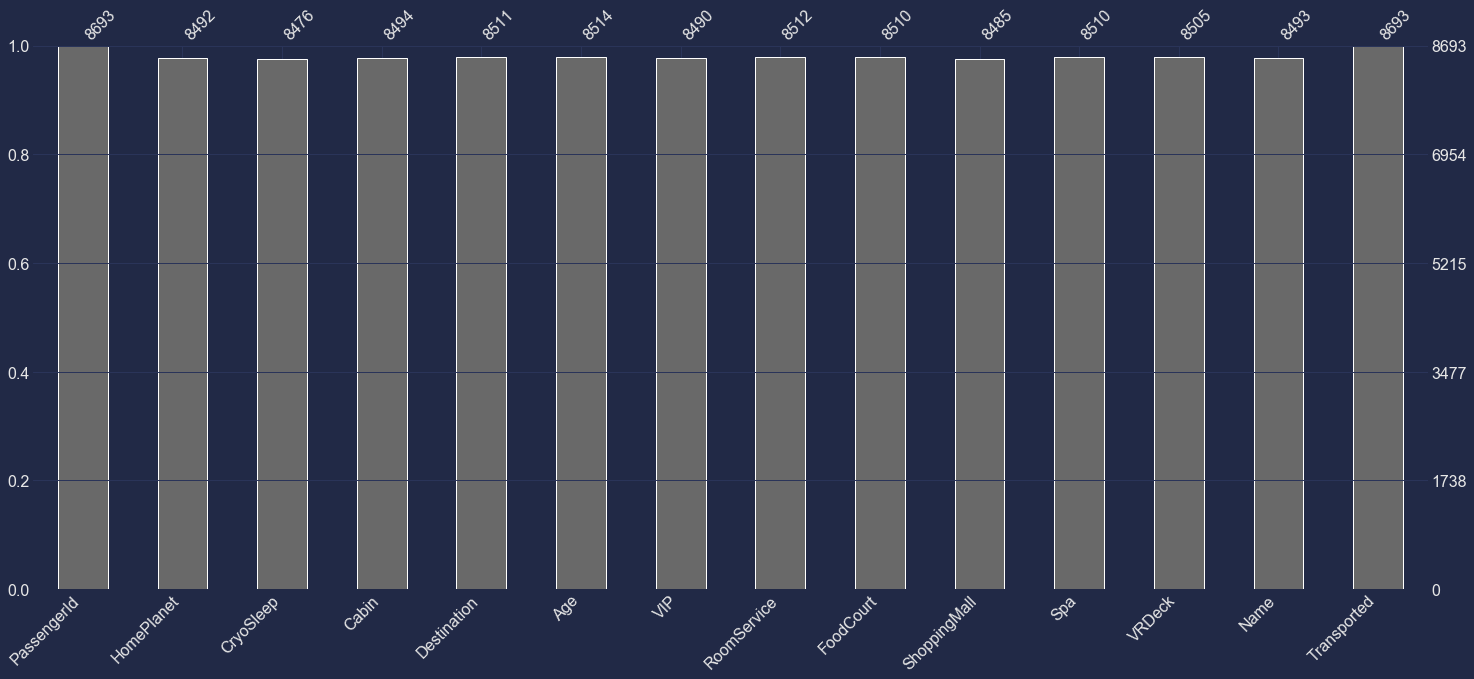

In [16]:
import missingno as msno
msno.bar(train)

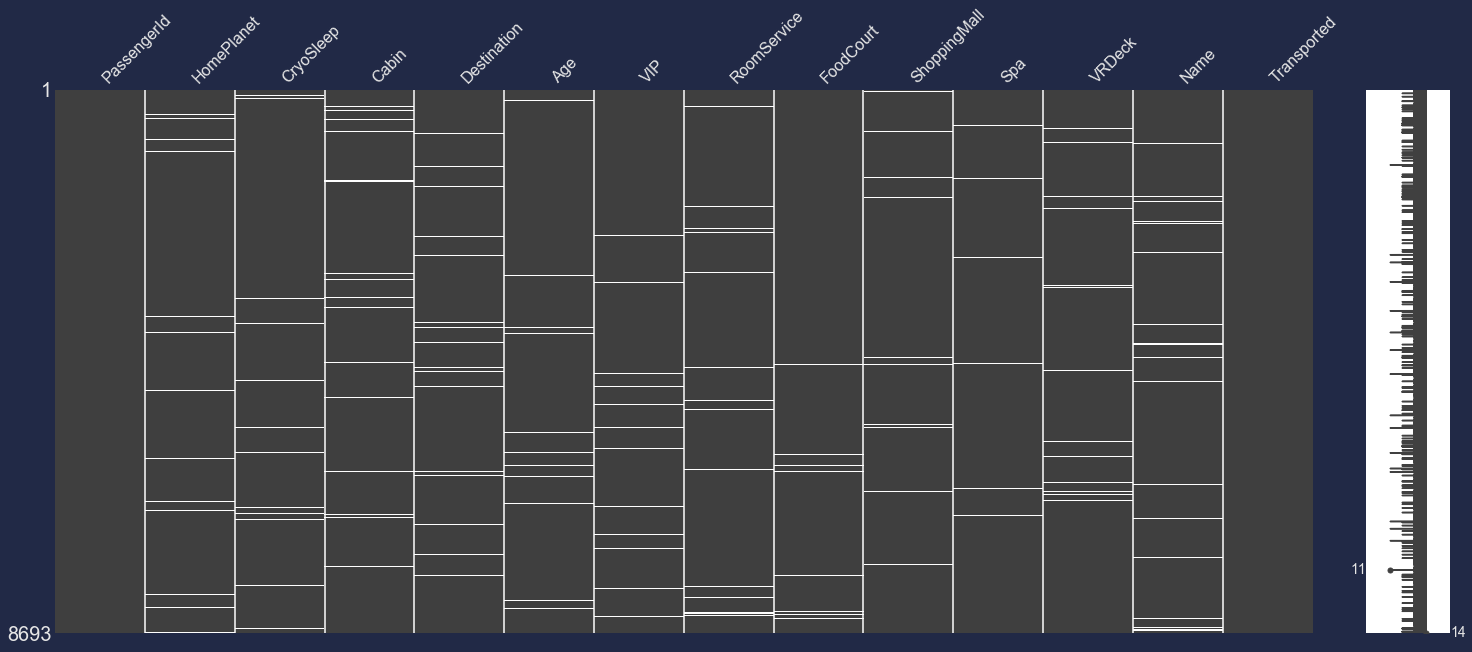

In [17]:
msno.matrix(train)

This helps us to know how the missing data is distributed through the data, that is if they are localized or evenly spread, or is there any pattern and many such questions.

To ensure that there are no correlations between them.

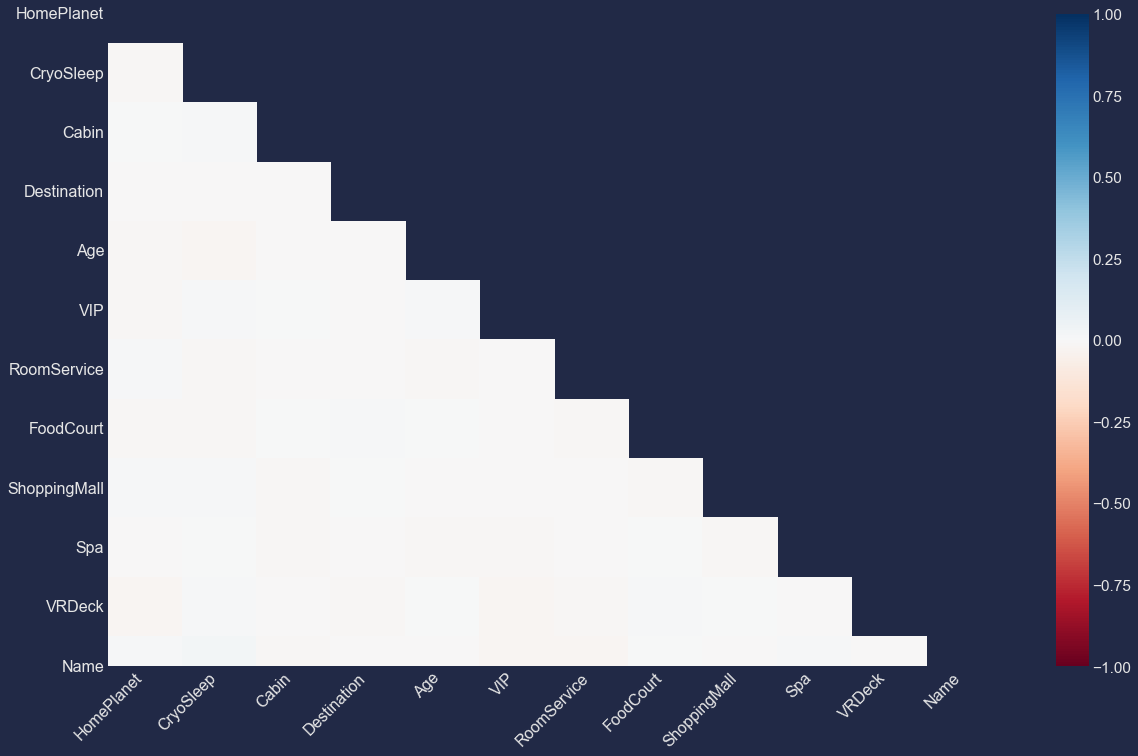

In [18]:
msno.heatmap(train)

## Imputation

In [19]:
# Dealing with Numeric features

train.Age=train.Age.fillna(train.Age.median())
train.RoomService=train.RoomService.fillna(train.RoomService.median())
train.FoodCourt=train.FoodCourt.fillna(train.FoodCourt.median())
train.ShoppingMall=train.ShoppingMall.fillna(train.ShoppingMall.median())
train.VRDeck=train.VRDeck.fillna(train.VRDeck.median())
train.Spa=train.Spa.fillna(train.Spa.median())

In [20]:
test.Age=test.Age.fillna(test.Age.median())
test.RoomService=test.RoomService.fillna(test.RoomService.median())
test.FoodCourt=test.FoodCourt.fillna(test.FoodCourt.median())
test.ShoppingMall=test.ShoppingMall.fillna(test.ShoppingMall.median())
test.VRDeck=test.VRDeck.fillna(test.VRDeck.median())
test.Spa=test.Spa.fillna(test.Spa.median())

Here, we cannot compute mean and median. So, we can fill the missing values with the mode or most frequently occurring class/category.

In [21]:
# Dealing with categorical features

train['Cabin']=train['Cabin'].fillna(train['Cabin'].value_counts().index[0])
train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].value_counts().index[0])
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].value_counts().index[0])
train['Destination']=train['Destination'].fillna(train['Destination'].value_counts().index[0])
train['VIP']=train['VIP'].fillna(train['VIP'].value_counts().index[0])
train['Name']=train['Name'].fillna(train['Name'].value_counts().index[0])

In [22]:
test['Cabin']=test['Cabin'].fillna(test['Cabin'].value_counts().index[0])
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].value_counts().index[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].value_counts().index[0])
test['Destination']=test['Destination'].fillna(test['Destination'].value_counts().index[0])
test['VIP']=test['VIP'].fillna(test['VIP'].value_counts().index[0])
test['Name']=test['Name'].fillna(test['Name'].value_counts().index[0])

In [23]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

# 4. Exploratory Data Analysis (EDA

An EDA is an examination meant to uncover the underlying structure of the information contained within a data-set. It is important because it exposes trends, patterns, and relationships that are not readily apparent at first glance.

The purpose of an EDA is to allow data scientists to analyze the data before coming to any assumption. In this EDA of the spaceship titanic dataset, we'll be looking at the relationships between the feature variables.

## Survival distribution

True     4378
False    4315
Name: Transported, dtype: int64

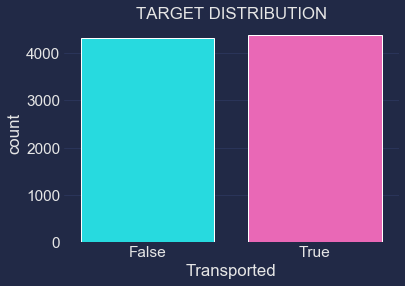

In [24]:
sns.countplot(train['Transported']).set_title("TARGET DISTRIBUTION")

train['Transported'].value_counts()

## Correlational Matrix

A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

In [25]:
corr = train.corr()
fig = px.imshow(corr, text_auto = True, aspect = 'auto')
fig.show()

Here we can see that FoodCourt, VRDeck and Spa has a higher correlation.

In [26]:
train_numerical_features = train.select_dtypes(exclude='object')
train_categorical_features = train.select_dtypes(include='object')

## Numerical Features vs Transported

### Age

Text(0.5, 0, 'Age (years)')

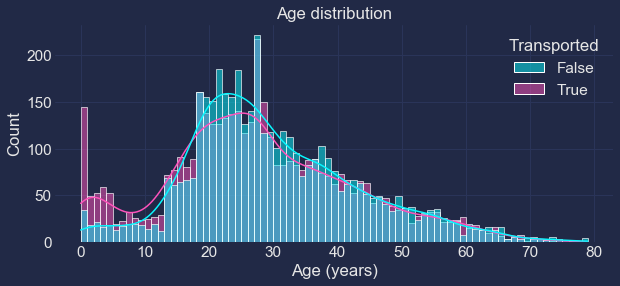

In [27]:
# Figure size
plt.figure(figsize=(10,4))
# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

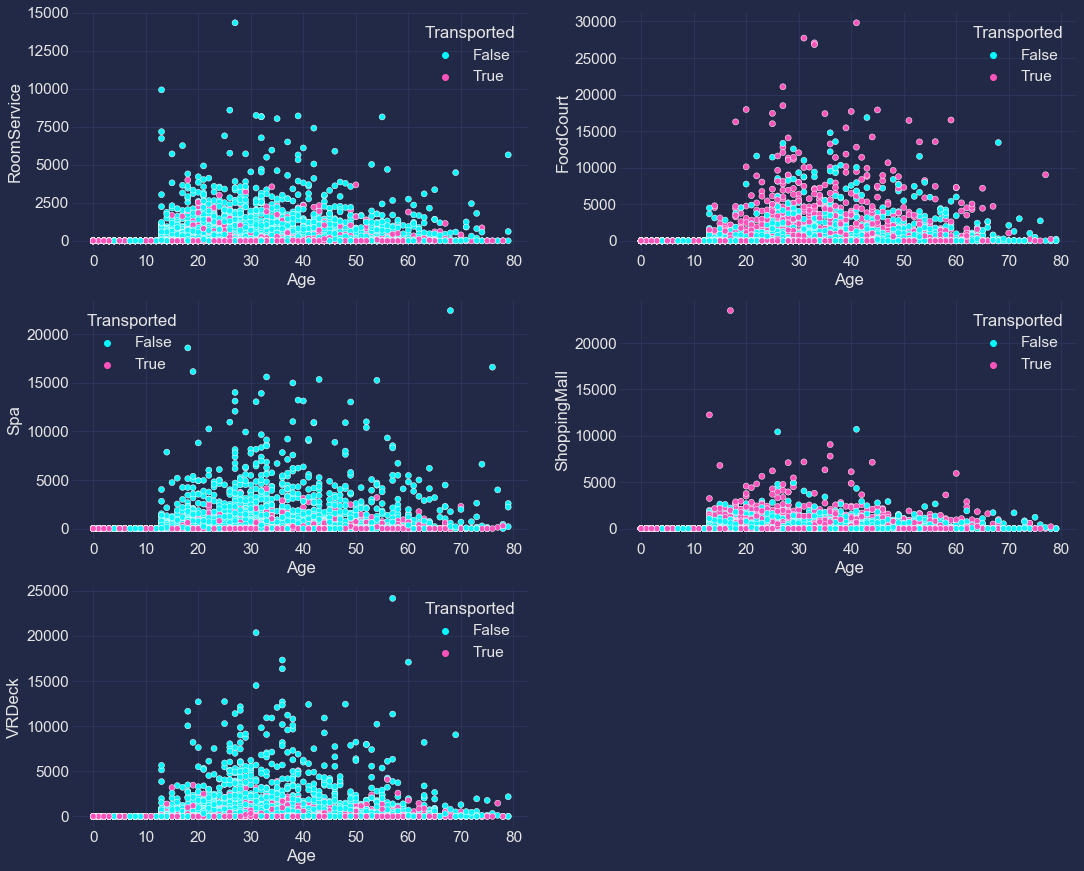

In [28]:
fig = plt.figure(figsize=(18, 15))

plt.subplot(3, 2, 1)
sns.scatterplot(x='Age', y='RoomService', hue='Transported', data=train)

plt.subplot(3, 2, 2)
sns.scatterplot(x='Age', y='FoodCourt', hue='Transported', data=train)

plt.subplot(3, 2, 3)
sns.scatterplot(x='Age', y='Spa', hue='Transported', data=train)

plt.subplot(3, 2, 4)
sns.scatterplot(x='Age', y='ShoppingMall', hue='Transported', data=train)

plt.subplot(3, 2, 5)
sns.scatterplot(x='Age', y='VRDeck', hue='Transported', data=train)

In [29]:
train.groupby(['HomePlanet', 'VIP'])['Age'].median().fillna(0)

HomePlanet  VIP  
Earth       False    24.0
            True     32.0
Europa      False    32.0
            True     35.0
Mars        False    27.0
            True     32.0
Name: Age, dtype: float64

it appears that there were no VIPs that aboarded from Earth.

### Expenditure

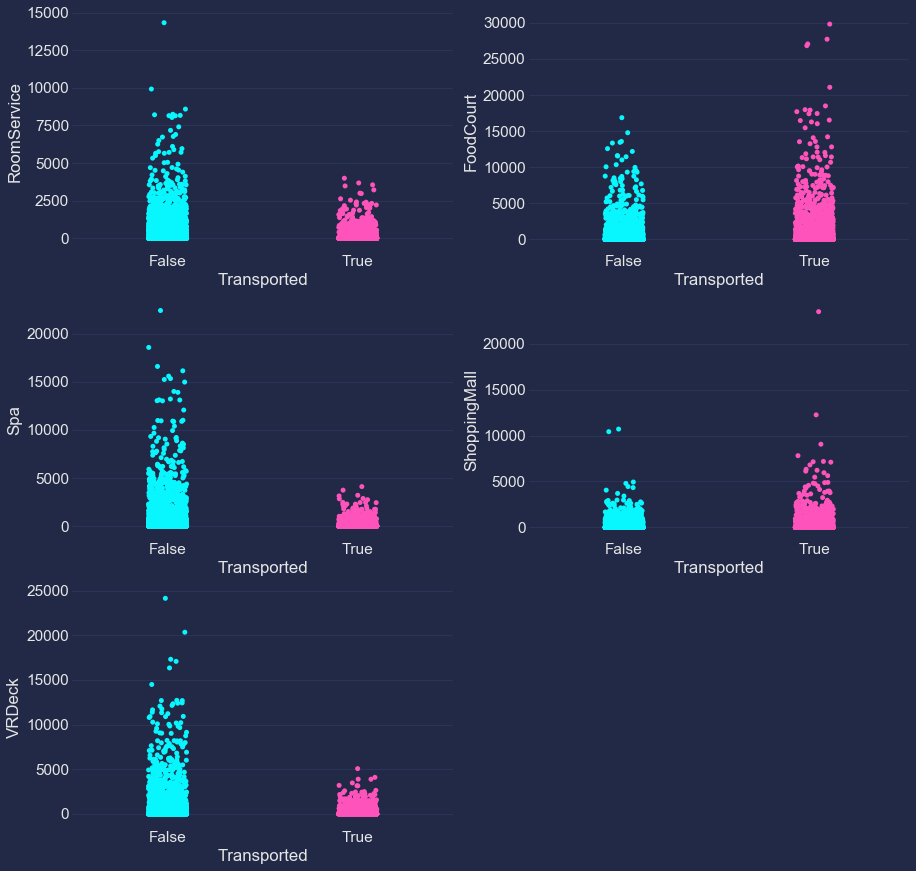

In [30]:
# Expenditure vs Transported

def strip_plot(df, x, y):
    sns.stripplot(x=df[x], y=df[y])
    
    
fig = plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
strip_plot(train, 'Transported', 'RoomService')

plt.subplot(3, 2, 2)
strip_plot(train, 'Transported', 'FoodCourt')

plt.subplot(3, 2, 3)
strip_plot(train, 'Transported', 'Spa')

plt.subplot(3, 2, 4)
strip_plot(train, 'Transported', 'ShoppingMall')

plt.subplot(3, 2, 5)
strip_plot(train, 'Transported', 'VRDeck')

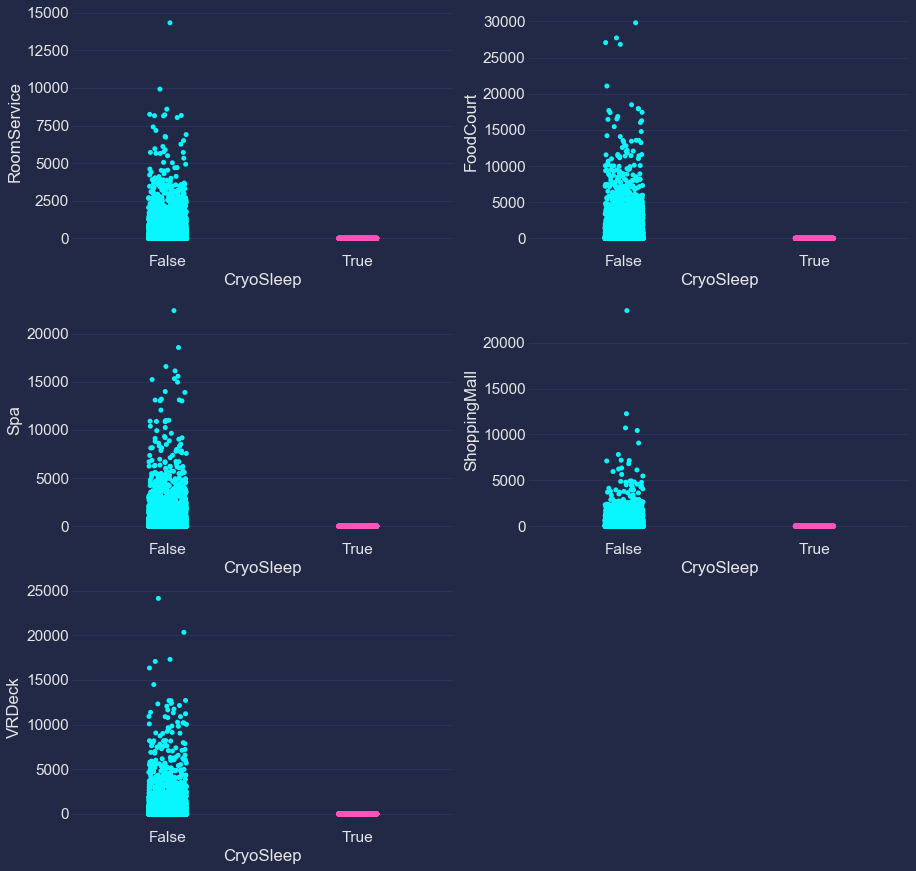

In [31]:
# Expenditure vs Cryosleep

fig = plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
strip_plot(train, 'CryoSleep', 'RoomService')

plt.subplot(3, 2, 2)
strip_plot(train, 'CryoSleep', 'FoodCourt')

plt.subplot(3, 2, 3)
strip_plot(train, 'CryoSleep', 'Spa')

plt.subplot(3, 2, 4)
strip_plot(train, 'CryoSleep', 'ShoppingMall')

plt.subplot(3, 2, 5)
strip_plot(train, 'CryoSleep', 'VRDeck')

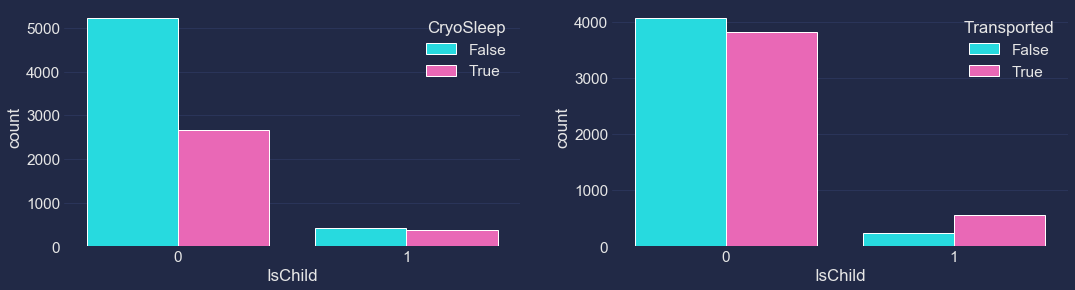

In [32]:

train['IsChild'] = 0
train.loc[train.Age <= 12, 'IsChild'] = 1
train.loc[train.Age > 12, 'IsChild'] = 0
    
fig = plt.figure(figsize=(18, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='IsChild', hue='CryoSleep', data=train)

plt.subplot(3, 2, 2)
sns.countplot(x='IsChild', hue='Transported', data=train)

## Categorical features

In [33]:
print("Categorical features:", train_categorical_features.columns)

Categorical features: Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')


In [34]:
train['PassengerId'].tail(10)

8683    9272_02
8684    9274_01
8685    9275_01
8686    9275_02
8687    9275_03
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, dtype: object

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


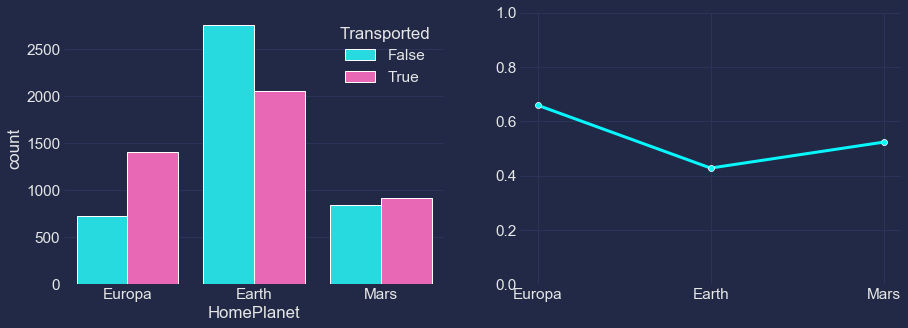

In [35]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='HomePlanet', hue='Transported', data=train)

print(train['HomePlanet'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='HomePlanet', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

False    5656
True     3037
Name: CryoSleep, dtype: int64


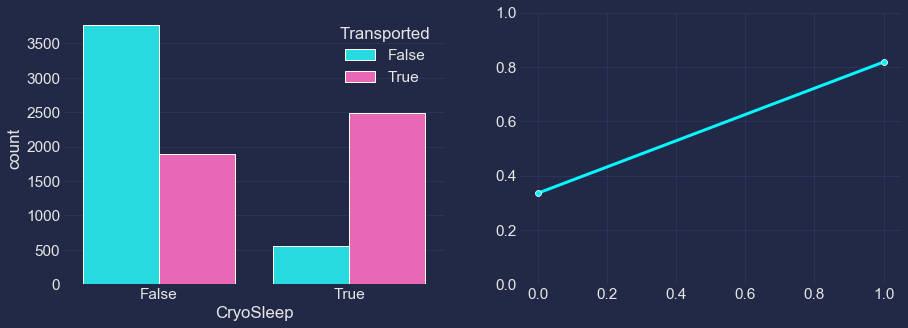

In [36]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='CryoSleep', hue='Transported', data=train)

print(train['CryoSleep'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='CryoSleep', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [37]:
train['Cabin'].value_counts()

G/734/S     207
G/1476/S      7
C/21/P        7
C/137/S       7
B/82/S        7
           ... 
D/117/P       1
F/1578/S      1
C/298/P       1
G/186/P       1
D/3/P         1
Name: Cabin, Length: 6560, dtype: int64

**Insight**: Seperate cabin into 3 columns: CabinDeck, CabinNum, CabinSide.

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


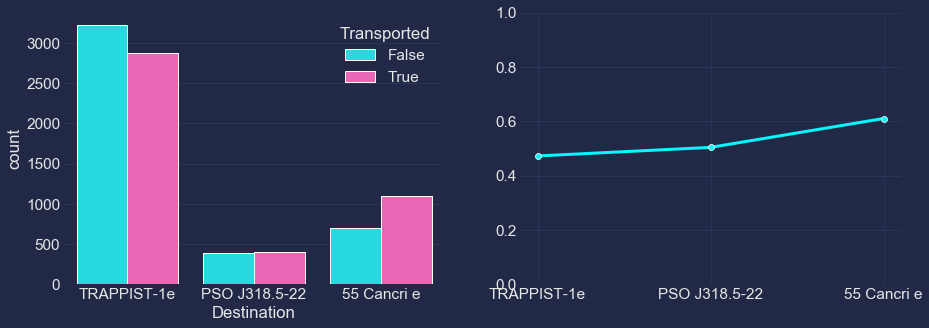

In [38]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='Destination', hue='Transported', data=train)

print(train['Destination'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='Destination', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

False    8494
True      199
Name: VIP, dtype: int64


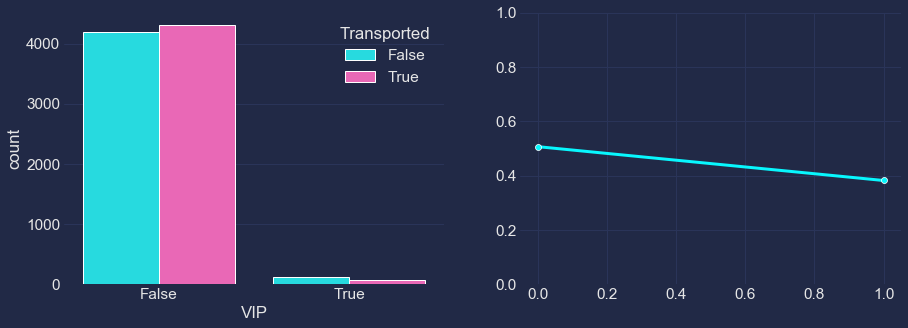

In [39]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='VIP', hue='Transported', data=train)

print(train['VIP'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='VIP', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

## Outliers

In [40]:
fig=px.box(train, y='Age')
fig.show()

In [41]:
fig=px.box(train, y='RoomService')
fig.show()

In [42]:
fig=px.box(train, y='FoodCourt')
fig.show()

In [43]:
fig=px.box(train, y='ShoppingMall')
fig.show()

In [44]:
fig=px.box(train, y='Spa')
fig.show()

In [45]:
fig=px.box(train, y='VRDeck')
fig.show()

The features with outleirs: 
Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

---

# 5. Feature Engineering

### Cabin

In [46]:
#train = train.fillna(train['Cabin'].value_counts().index[0])

In [47]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
IsChild         0
dtype: int64

In [48]:
train[['CabinDeck', 'CabinNum', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)

test[['CabinDeck', 'CabinNum', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [49]:
CMAP = ['#003f5c', '#ffa600', '#ff6e54', '#444e86', '#955196', '#dd5182']

In [50]:
# convert cabin num to integer while preserving the nan values
train['CabinNum']= [int(num) if num is not np.nan else num for num in train.CabinNum]

test['CabinNum']= [int(num) if num is not np.nan else num for num in test.CabinNum]

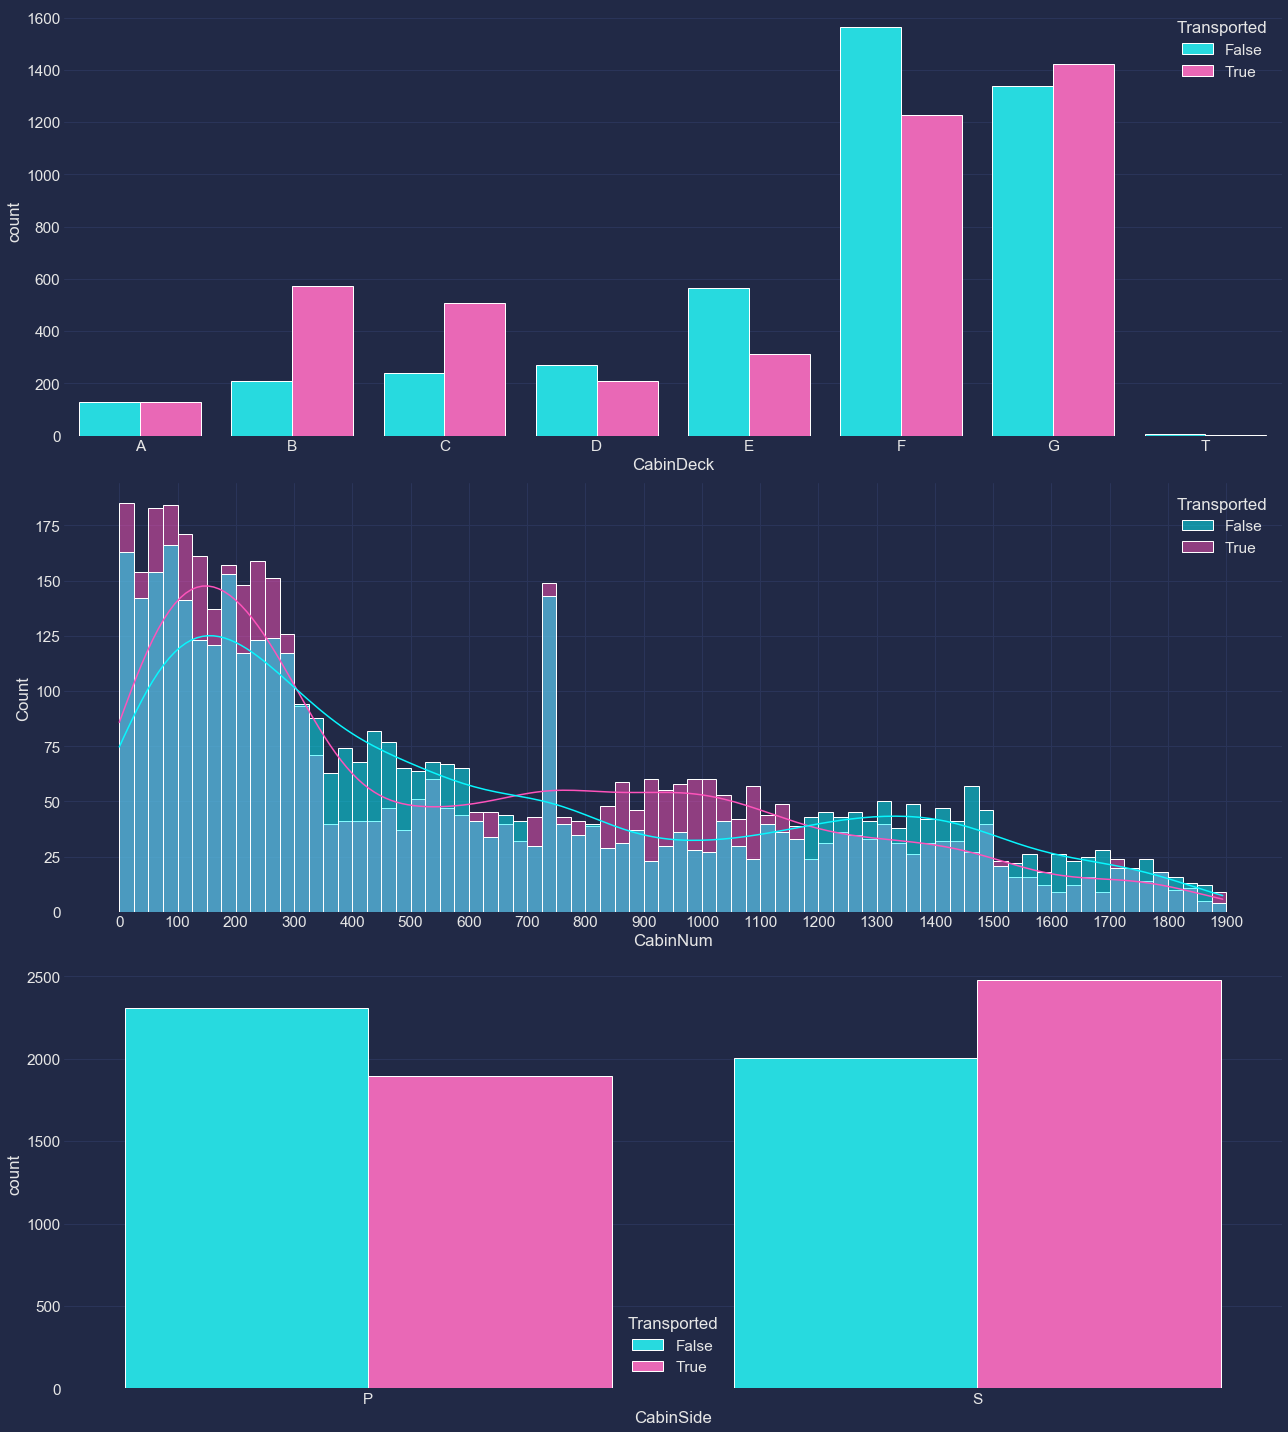

In [51]:
# plot the cabin features
fig, axes = plt.subplots(figsize=(18, 20), nrows=3, ncols=1)
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
# cabin deck
sns.countplot(data=train, x='CabinDeck', hue='Transported', ax=axes[0], order=deck_order)
train['CabinDeck'].value_counts()

# cabin num
sns.histplot(data=train, x='CabinNum', binwidth=25, hue='Transported', ax=axes[1], kde=True)
axes[1].set_xticks(range(0, 2000, 100))

# cabin side
sns.countplot(data=train, x='CabinSide', hue='Transported', ax=axes[2])

fig.tight_layout()
plt.show()

### PassengerId

In [52]:
train[['Id_grp', 'Id_num']] = train['PassengerId'].str.split('_', expand=True)

test[['Id_grp', 'Id_num']] = test['PassengerId'].str.split('_', expand=True)

In [53]:
print(train['Id_num'].value_counts())
print('-'*100)
print(test['Id_num'].value_counts())

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: Id_num, dtype: int64
----------------------------------------------------------------------------------------------------
01    3063
02     723
03     269
04     107
05      56
06      33
07      20
08       6
Name: Id_num, dtype: int64


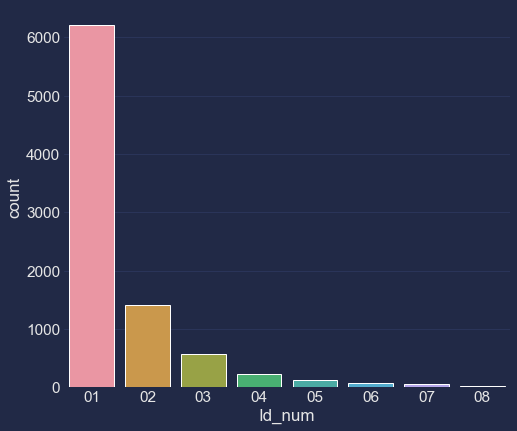

In [54]:
plt.figure(figsize=(8, 7))
sns.countplot(x='Id_num', data=train)

### Expenditure

In [55]:
train['Premium'] = train['RoomService'] + train['Spa'] + train['VRDeck']
train['Basic'] = train['FoodCourt'] + train['ShoppingMall']
train['All_Services'] = train['RoomService'] + train['Spa'] + train['VRDeck'] + train['FoodCourt'] + train['ShoppingMall']

In [56]:
test['Premium'] = test['RoomService'] + test['Spa'] + test['VRDeck']
test['Basic'] = test['FoodCourt'] + test['ShoppingMall']
test['All_Services'] = test['RoomService'] + test['Spa'] + test['VRDeck'] + test['FoodCourt'] + test['ShoppingMall']

### Name

In [57]:
train[['FirstName', 'LastName']] = train['Name'].str.split(' ', expand=True)

train['FamilySize'] = train['LastName'].map(lambda x: train['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)

In [58]:
test[['FirstName', 'LastName']] = test['Name'].str.split(' ', expand=True)

test['FamilySize'] = test['LastName'].map(lambda x: test['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)

[(1, 18)]

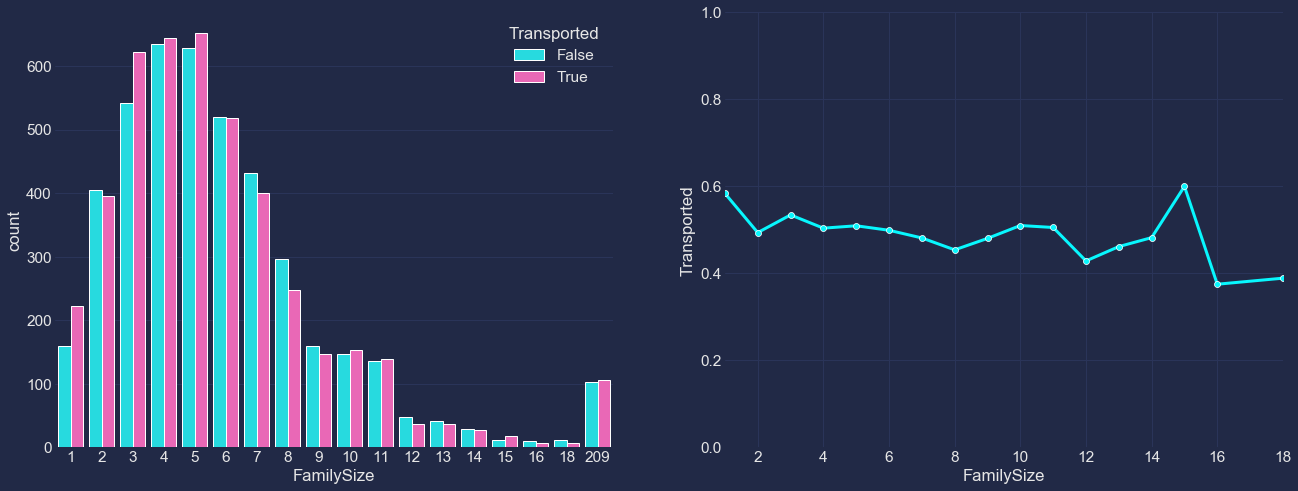

In [59]:
plt.subplots(figsize = (22, 8))
plt.subplot(1,2,1)
sns.countplot(x=train['FamilySize'], hue='Transported', data=train)

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot(x='FamilySize', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlim = (1, 18))

# 6. Data wrangling

### Age binning

In [60]:
#training data

train.loc[train['Age'] <= 1, 'Age_Band'] = 'Infant'
train.loc[(train['Age'] > 1) & (train['Age'] <= 4), 'Age_Band'] = 'Toddler'
train.loc[(train['Age'] > 4) & (train['Age'] <= 12), 'Age_Band'] = 'Child'
train.loc[(train['Age'] > 12) & (train['Age'] <= 19), 'Age_Band'] = 'Teen'
train.loc[(train['Age'] > 19) & (train['Age'] <= 39), 'Age_Band'] = 'Adult'
train.loc[(train['Age'] > 39) & (train['Age'] <= 59), 'Age_Band'] = 'Mid_Age'
train.loc[train['Age'] > 59, 'Age_Band'] = 'Senior'

In [61]:
test.loc[test['Age'] <= 1, 'Age_Band'] = 'infant'
test.loc[(test['Age'] > 1) & (test['Age'] <= 4), 'Age_Band'] = 'toddler'
test.loc[(test['Age'] > 4) & (test['Age'] <= 12), 'Age_Band'] = 'child'
test.loc[(test['Age'] > 12) & (test['Age'] <= 19), 'Age_Band'] = 'teen'
test.loc[(test['Age'] > 19) & (test['Age'] <= 39), 'Age_Band'] = 'adult'
test.loc[(test['Age'] > 39) & (test['Age'] <= 59), 'Age_Band'] = 'mid_age'
test.loc[test['Age'] > 59, 'Age_Band'] = 'senior'

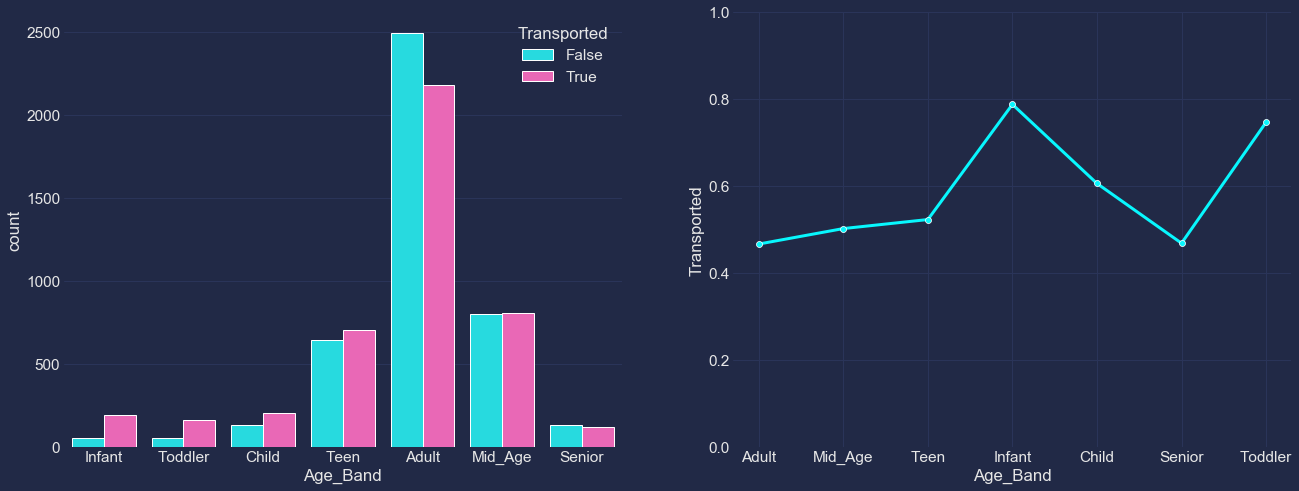

In [62]:
plt.subplots(figsize = (22, 8))
plt.subplot(1,2,1)
Age_Group = ['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Mid_Age', 'Senior']
sns.countplot(x='Age_Band', hue='Transported', data=train, order=Age_Group)

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot(x='Age_Band', y='Transported', data=train, ci=None, linewidth=3, marker="o")

## Dummy encoding

In [63]:
train.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall  ...  CabinSide  Id_grp Id_num  \
0          0.0        0.0           0.0  ...          P    0001     01   
1        109.0        9.0          25.0  ...          S    0002     01   
2         43.0     3576.0           0.0  ...          S    0003     01   
3          0.0     1283.0         371.0  ...          S    0003     02   
4        303.0       70.0         151.0  ...          S    0004     01   

   Premium   Basic All_Services  FirstName     LastName FamilySize Age_Band  
0      0.0     0.0          0.0      Maham    Ofracculy          1    Adult  
1    702.0    34.0        736.0     Juanna        Vines          4    Adult  
2   6807.0  3576.0      10383.0     Altark       Susent          6  Mid_Age  
3   3522.0  1654.0       5176.0      Solam       Susent          6    Adult  
4    870.0   221.0       1091.0      Willy  Santantines          6     Teen  

[5 rows x 27 columns]

In [64]:
# Id_grp
train['Id_num'] = train['Id_num'].astype('int')
test['Id_num'] = test['Id_num'].astype('int')

In [65]:
# Id_grp
train['Id_grp'] = train['Id_grp'].astype('int')
test['Id_grp'] = test['Id_grp'].astype('int')

In [66]:
# CryoSleep
train['CryoSleep'] = train['CryoSleep'].astype('int')
test['CryoSleep'] = test['CryoSleep'].astype('int')

In [67]:
# VIP
train['VIP'] = train['VIP'].astype('int')
test['VIP'] = test['VIP'].astype('int')

In [68]:
# CabinDeck
train['CabinDeck']=train['CabinDeck'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],[1,2,3,4,5,6,7,8])
test['CabinDeck']=test['CabinDeck'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],[1,2,3,4,5,6,7,8])

In [69]:
#train['Transported'] = train['Transported'].astype('int')

In [70]:
# dummy features
train = pd.get_dummies(train,columns=['Age_Band', 'Destination', 'HomePlanet', 'CabinSide', ])
test = pd.get_dummies(test,columns=['Age_Band', 'Destination', 'HomePlanet', 'CabinSide', ])

In [71]:
print('train', train.shape)
print('test', test.shape)

train (8693, 38)
test (4277, 36)


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 38 columns):
PassengerId                  8693 non-null object
CryoSleep                    8693 non-null int32
Cabin                        8693 non-null object
Age                          8693 non-null float64
VIP                          8693 non-null int32
RoomService                  8693 non-null float64
FoodCourt                    8693 non-null float64
ShoppingMall                 8693 non-null float64
Spa                          8693 non-null float64
VRDeck                       8693 non-null float64
Name                         8693 non-null object
Transported                  8693 non-null bool
IsChild                      8693 non-null int64
CabinDeck                    8693 non-null int64
CabinNum                     8693 non-null int64
Id_grp                       8693 non-null int32
Id_num                       8693 non-null int32
Premium                      8693 non-null flo

In [73]:
train=train.drop(['PassengerId', 'Cabin', 'IsChild', 'Name', 'FirstName', 'LastName', 'Id_num'], axis=1)
test=test.drop(['Cabin', 'Name', 'FirstName', 'LastName', 'Id_num'], axis=1)

In [74]:
train.head()

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0          0  39.0    0          0.0        0.0           0.0     0.0     0.0   
1          0  24.0    0        109.0        9.0          25.0   549.0    44.0   
2          0  58.0    1         43.0     3576.0           0.0  6715.0    49.0   
3          0  33.0    0          0.0     1283.0         371.0  3329.0   193.0   
4          0  16.0    0        303.0       70.0         151.0   565.0     2.0   

   Transported  CabinDeck  ...  Age_Band_Teen  Age_Band_Toddler  \
0        False          2  ...              0                 0   
1         True          6  ...              0                 0   
2        False          1  ...              0                 0   
3        False          1  ...              0                 0   
4         True          6  ...              1                 0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   Destination_TRAPPIST-1e  HomePlanet_Earth  HomePlanet_Europa  \
0                        1                 0                  1   
1                        1                 1                  0   
2                        1                 0                  1   
3                        1                 0                  1   
4                        1                 1                  0   

   HomePlanet_Mars  CabinSide_P  CabinSide_S  
0                0            1            0  
1                0            0            1  
2                0            0            1  
3                0            0            1  
4                0            0            1  

[5 rows x 31 columns]

# 7. Model

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV


In [76]:
# getting target data from the dataframe
y = train["Transported"]
 
# getting train data from the dataframe
x = train.drop(["Transported"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=0)

### Random forest model

In [ ]:
params_dict={'n_estimators':[100,200,300,400,500], 'max_features':['auto','sqrt','log2']}
rf_clf=RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), param_distributions=params_dict, scoring='accuracy', cv=10)
rf_clf.fit(X_train, y_train)

In [ ]:
rf_clf.best_params_

In [ ]:
rf_clf.best_score_

In [ ]:
pred=rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred), ": is the confusion matrix \n")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, pred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, pred), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, pred), ": is the f1 score")

In [ ]:
#ckeck for null values
print(test.isnull().sum())
print("-"*100)
print("Train dataset:", train.shape)

print("-"*100)
print("Test dataset:", test.shape)
test.columns

In [ ]:
test_id=test['PassengerId']
submission_pred = rf_clf.predict(test.drop('PassengerId', axis=1))

df=pd.DataFrame({"PassengerId":test_id.values,"Transported":submission_pred,})

In [ ]:
#save the predictions in the csv file
df.to_csv("Submission.csv",index=False)

In [ ]:
df=pd.read_csv('Submission.csv')
df.info()

In [ ]:
df.head()